#### Q2.A dataset collected in a cosmetics shop showing details of customers and whether or not they responded to a special offer to buy a new lipstick is shown in the table below. Use this dataset to build a decision tree, with Buys as the target variable, to help in buying lip-sticks in the future. Find the root node of the decision tree. According to the decision tree, you have made from the previous Training data set, what is the decision for the test data: [Age < 21, Income = Low, Gender = Female, Marital Status = Married]? Write the concluding statement for the implemented application.


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
dataset = {
'Id':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
'Age':['<21','<21','21-35','>35','>35','>35','21-35','<21','<21','>35','<21','21-35','21-35','>35'],
'Income':['High','High','High','Medium','Low','Low','Low','Medium','Low','Medium','Medium','Medium','High','Medium'],
'Gender':['Male','Male','Male','Male','Female','Female','Female','Male','Female','Female','Female','Male','Female','Male'],
'MaritalStatus':['Single','Married','Single','Single','Single','Married','Married','Single','Married','Single','Married','Married','Single','Married'],
'Buys':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}

In [73]:
df = pd.DataFrame(dataset,columns=['Id','Age','Income','Gender','MaritalStatus','Buys'])

In [74]:
df

,Id,Age,Income,Gender,MaritalStatus,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [75]:
df.shape

(14, 6)

In [76]:
df['Buys'].value_counts()

Yes    9
No     5
Name: Buys, dtype: int64

In [77]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Age']=le.fit_transform(df['Age'])
df['Gender']=le.fit_transform(df['Gender'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['Buys']=le.fit_transform(df['Buys'])
df['Income']=le.fit_transform(df['Income'])

In [78]:
df
# Age           #Income       #Gender        MaritalStatus    Buys
# <21= 1        High=0         male=1         Single=1        No=0
# 21-35=0       Medium=2       female=0       Married=0       Yes=1
# >35=2         Low=1

,Id,Age,Income,Gender,MaritalStatus,Buys
0,1,1,0,1,1,0
1,2,1,0,1,0,0
2,3,0,0,1,1,1
3,4,2,2,1,1,1
4,5,2,1,0,1,1
5,6,2,1,0,0,0
6,7,0,1,0,0,1
7,8,1,2,1,1,0
8,9,1,1,0,0,1
9,10,2,2,0,1,1


In [79]:

X=df.iloc[:,1:-1].values

In [80]:
X

array([[1, 0, 1, 1],
       [1, 0, 1, 0],
       [0, 0, 1, 1],
       [2, 2, 1, 1],
       [2, 1, 0, 1],
       [2, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 2, 1, 1],
       [1, 1, 0, 0],
       [2, 2, 0, 1],
       [1, 2, 0, 0],
       [0, 2, 1, 0],
       [0, 0, 0, 1],
       [2, 2, 1, 0]])

In [81]:
y=df.iloc[:,-1].values

In [82]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [83]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [84]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10, 4), (4, 4), (10,), (4,))

In [85]:
# model building

from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [92]:
#predict  [< 21= 1,Low= 1, Female=0, Married=0]
print(classifier.predict([[1,1,0,0]]))

[0]


In [93]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 1, 0, 1])

In [88]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cm = confusion_matrix(y_test,y_pred)
cm

array([[0, 0],
       [2, 2]], dtype=int64)

In [89]:
accuracy_score(y_test,y_pred)

0.5

In [90]:
print((np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)))

[[0 1]
 [1 1]
 [0 1]
 [1 1]]


## Conclusion


#### Predicted class for input [Age>21 , Income = Low , Gender = Female , Marital Status = Married]
#### i. e. [1,1,0,0] is No[0]

#### Problem Statement 1:
#### Amit wants to purchase office space. He does a detailed survey of the offices and corporate complexes in the area and tries to quantify a lot of factors, such as the distance of the offices from residential and other commercial areas, schools, and workplaces; the reputation of the construction companies, and builders involved in constructing the apartments; the distance of the offices from highways, freeways, and important roads; the facilities around the office space and so on.
#### Each of these factories was quantified, normalized, and mapped to values on a scale of 0 to 1. Amit then makes a table. Each row in the table corresponds to Amit's observations for a particular house. If Amit has observed and noted F features, the row contains F values separated by a single space, followed by the office-space price in dollars/square-foot. If Amit makes observations for H houses, his observation table has (F+1) columns and H rows, and a total of (F+1) * H entries.
#### Amit does several such surveys and provides you with the tabulated data. At the end of these tables are some rows which have just F columns (the price per square foot is missing). Your task is to predict these prices. F can be any integer number between 1 and 5, both inclusive.
#### There is one important observation that Amit has made. The prices per square foot, are (approximately) a polynomial function of the features in the observation table. This polynomial always has an order less than 4


In [131]:
import pandas as pd
import numpy as np

In [132]:
df1=pd.read_csv("C:\\Users\\sbhus\\Downloads\\data.csv")

In [133]:
df1

,F,N,Prprice per square foot
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
...,...,...,...
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53


In [134]:
df1.shape

(100, 3)

In [135]:
X=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values


In [136]:
X

array([[0.44, 0.68],
       [0.99, 0.23],
       [0.84, 0.29],
       [0.28, 0.45],
       [0.07, 0.83],
       [0.66, 0.8 ],
       [0.73, 0.92],
       [0.57, 0.43],
       [0.43, 0.89],
       [0.27, 0.95],
       [0.43, 0.06],
       [0.87, 0.91],
       [0.78, 0.69],
       [0.9 , 0.94],
       [0.41, 0.06],
       [0.52, 0.17],
       [0.47, 0.66],
       [0.65, 0.43],
       [0.85, 0.64],
       [0.93, 0.44],
       [0.41, 0.93],
       [0.36, 0.43],
       [0.78, 0.85],
       [0.69, 0.07],
       [0.04, 0.52],
       [0.17, 0.15],
       [0.68, 0.13],
       [0.84, 0.6 ],
       [0.38, 0.4 ],
       [0.12, 0.65],
       [0.62, 0.17],
       [0.79, 0.97],
       [0.82, 0.04],
       [0.91, 0.53],
       [0.35, 0.85],
       [0.57, 0.69],
       [0.52, 0.22],
       [0.31, 0.15],
       [0.6 , 0.02],
       [0.99, 0.91],
       [0.48, 0.76],
       [0.3 , 0.19],
       [0.58, 0.62],
       [0.65, 0.17],
       [0.6 , 0.69],
       [0.95, 0.76],
       [0.47, 0.23],
       [0.15,

In [137]:
y

array([ 511.14,  717.1 ,  607.91,  270.4 ,  289.88,  830.85, 1038.09,
        455.19,  640.17,  511.06,  177.03, 1242.52,  891.37, 1339.72,
        169.88,  276.05,  517.43,  522.25,  932.21,  851.25,  640.11,
        308.68, 1046.05,  332.4 ,  171.85,  109.55,  361.97,  872.21,
        303.7 ,  256.38,  341.2 , 1194.63,  408.6 ,  895.54,  518.25,
        638.75,  301.9 ,  163.38,  240.77, 1449.05,  609.  ,  174.59,
        593.45,  355.96,  671.46, 1193.7 ,  278.88,  411.4 ,   42.08,
        166.19,   58.62,  642.45,  368.14,  702.78,  615.74,  143.79,
        109.  ,  328.28,  205.16, 1360.49,  905.83,  487.33,  202.76,
        202.01,  148.87,  745.3 ,  503.04, 1563.82,  165.21,  438.4 ,
         98.47,  819.63,  174.44,  483.13,  534.24,  572.31,  957.61,
        518.29, 1143.49, 1211.31,  784.74,  283.7 ,  684.38,  719.46,
        292.23,  775.68,  130.77,  801.6 ,  323.55,  726.9 ,  661.12,
        771.11, 1016.14,  237.69,  325.89,  636.22,  272.12,  696.65,
        434.53,  593

In [138]:
# train test split
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [139]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((75, 2), (25, 2), (75,), (25,))

In [148]:
#multiple Linear Regression Model

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [150]:
y_pred=reg.predict(X_test)
y_pred

array([ 427.59386393,   62.27150236,  671.59572566,   72.7099062 ,
        652.89475883,  238.82738246,  587.62846413,  572.92423103,
        675.86155492,  699.1461419 ,  750.75127466,  968.51873294,
       1049.67072577, 1146.02798569,  525.94756767,  400.99682034,
        982.49768576,  120.09405895,  888.68275291,  701.867866  ,
        427.27607304,  182.36568792,  284.89552242,  838.71142383,
       1073.000162  ])

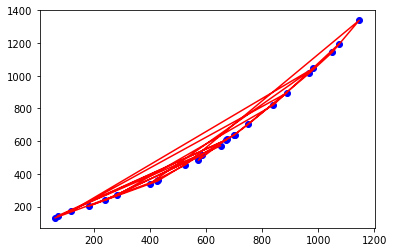

In [155]:
plt.scatter(y_pred,y_test,color='blue')
plt.plot(y_pred,y_test,color='red')

In [156]:
reg.predict([[0.44,0.68]])

array([574.32994234])

In [160]:
reg.predict([[0.99, 0.23]])

array([764.04979646])

In [161]:
reg.predict([[0.84, 0.29]])

array([671.59572566])

In [ ]:
reg.predict([[0.90,0.94]])

In [159]:
print((np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)))

[[ 427.59386393  361.97      ]
 [  62.27150236  130.77      ]
 [ 671.59572566  607.91      ]
 [  72.7099062   143.79      ]
 [ 652.89475883  572.31      ]
 [ 238.82738246  237.69      ]
 [ 587.62846413  517.43      ]
 [ 572.92423103  483.13      ]
 [ 675.86155492  615.74      ]
 [ 699.1461419   636.22      ]
 [ 750.75127466  702.78      ]
 [ 968.51873294 1016.14      ]
 [1049.67072577 1143.49      ]
 [1146.02798569 1339.72      ]
 [ 525.94756767  455.19      ]
 [ 400.99682034  341.2       ]
 [ 982.49768576 1046.05      ]
 [ 120.09405895  171.85      ]
 [ 888.68275291  895.54      ]
 [ 701.867866    640.17      ]
 [ 427.27607304  355.96      ]
 [ 182.36568792  202.76      ]
 [ 284.89552242  270.4       ]
 [ 838.71142383  819.63      ]
 [1073.000162   1193.7       ]]


In [164]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(X_train)


In [165]:
lr2=LinearRegression()
lr2.fit(x_poly,y_train)


LinearRegression()

In [166]:
y_pred=lr2.predict(poly_reg.fit_transform(X_test))

In [167]:
y_pred


array([ 359.58915172,  131.82095461,  609.72215908,  149.39336011,
        566.19668753,  237.46132576,  520.68059211,  484.67293649,
        620.31294669,  632.3587041 ,  703.85037568, 1026.78741106,
       1151.20919748, 1331.56638209,  460.93466225,  340.9758766 ,
       1042.18654649,  170.33113971,  903.34352405,  635.60362775,
        362.16134831,  204.31217008,  266.95707126,  830.12319651,
       1204.52945005])

In [168]:
print((np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)))

[[ 359.58915172  361.97      ]
 [ 131.82095461  130.77      ]
 [ 609.72215908  607.91      ]
 [ 149.39336011  143.79      ]
 [ 566.19668753  572.31      ]
 [ 237.46132576  237.69      ]
 [ 520.68059211  517.43      ]
 [ 484.67293649  483.13      ]
 [ 620.31294669  615.74      ]
 [ 632.3587041   636.22      ]
 [ 703.85037568  702.78      ]
 [1026.78741106 1016.14      ]
 [1151.20919748 1143.49      ]
 [1331.56638209 1339.72      ]
 [ 460.93466225  455.19      ]
 [ 340.9758766   341.2       ]
 [1042.18654649 1046.05      ]
 [ 170.33113971  171.85      ]
 [ 903.34352405  895.54      ]
 [ 635.60362775  640.17      ]
 [ 362.16134831  355.96      ]
 [ 204.31217008  202.76      ]
 [ 266.95707126  270.4       ]
 [ 830.12319651  819.63      ]
 [1204.52945005 1193.7       ]]


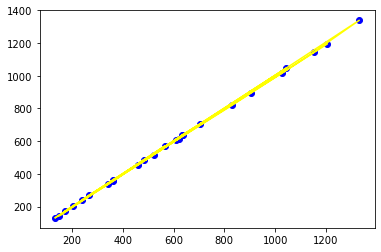

In [169]:
plt.scatter(y_pred,y_test,color='blue')
plt.plot(y_pred,y_test,color='yellow')

### conclusion

#